In [ ]:
!pip install --upgrade pandas gensim pyLDAvis joblib

In [ ]:
pip install pymorphy2

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import pymorphy2
from nltk.tokenize import word_tokenize
import re


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import re
import numpy as np
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
!python -m spacy download en_core_web_sm
# spacy for lemmatization
import spacy
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
!pip install pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline


# Загрузка данных

In [ ]:
import pandas as pd
file_path = 'financial_review.csv'
df = pd.read_csv(file_path)
df.head()

,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href
0,/kredit-evropa-bank.html,NaN,"Брал кредит в данной организации, после погаше...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
1,/kredit-evropa-bank.html,NaN,"В 2011 году,мною была оформлена мега карта в Т...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
2,/kredit-evropa-bank.html,NaN,С родителями увидели рекламу вклада Осеннее пр...,кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
3,/kredit-evropa-bank.html,NaN,Связать три года своей жизни с этим непорядочн...,кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
4,/kredit-evropa-bank.html,NaN,"Пользуюсь месяц карточкой Card Plus, сегодня п...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['bank_name'].value_counts()

bank_name
втб                            2603
сбербанк                       2481
тинькофф банк                  1476
почта банк                     1264
альфа-банк                     1260
                               ... 
миллениум банк                    1
народный доверительный банк       1
руна-банк                         1
приморье                          1
кемсоцинбанк                      1
Name: count, Length: 475, dtype: int64

In [ ]:
data = df[df['bank_name'] == "тинькофф банк"]
data.head()

,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href
2487,/tinkoff-kreditnye-sistemy.html,NaN,"С финансами было все не плохо,была работа у му...",тинькофф банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
2488,/tinkoff-kreditnye-sistemy.html,NaN,Вчера закрывал задолженность по карте Тинькофф...,тинькофф банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
2489,/tinkoff-kreditnye-sistemy.html,NaN,"Вот так! Я клиент банка уже почти год, имею и ...",тинькофф банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
2490,/tinkoff-kreditnye-sistemy.html,NaN,"Хороший надежный Банк, клиентом которого я явл...",тинькофф банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
2491,/tinkoff-kreditnye-sistemy.html,NaN,19.11.2016 у меня были украдены деньги с карты...,тинькофф банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN


# Предобработка

In [ ]:
data['score'].replace('', np.nan, inplace=True)

data.dropna(subset=['score'], inplace=True)

<ipython-input-262-4154ab8ce5b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['score'].replace('', np.nan, inplace=True)
<ipython-input-262-4154ab8ce5b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'].replace('', np.nan, inplace=True)
<ipython-input-262-4154ab8ce5b5>:3: SettingWithCopyWarning: 
A value is trying to be 

In [ ]:
# Convert to list
data = data.review.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[0])

 У меня счет ИП в этом банке. несколько дней назад возникла проблема с выписыванием счетов. Персональный менеджер Алексей Казачков был на связи все время до решения проблемы. К стати хочу похвалить еще интернет экваринг. У меня бизнес построен через соц-сети. Позвонила в банк. Предложили решение проблемы. очень удобно. Спасибо! 


In [ ]:
# tokenize
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[50])
print(len(data_words))

['мне', 'пришел', 'стандартныи', 'штраф', 'из', 'голландии', 'за', 'превышение', 'скорости', 'на', 'арендованнои', 'машине', 'стандартная', 'практика', 'штрафы', 'пересылаются', 'тому', 'кто', 'момент', 'его', 'выставления', 'арендовал', 'автомобиль', 'общем', 'штраф', 'на', 'euro', 'сам', 'штраф', 'это', 'лист', 'текстом', 'сторон', 'то', 'есть', 'всего', 'стр', 'на', 'первои', 'странице', 'информация', 'на', 'голландском', 'языке', 'превышении', 'месте', 'камеры', 'прочая', 'ненужная', 'информация', 'на', 'второи', 'странице', 'информация', 'как', 'оплатить', 'на', 'языках', 'немецком', 'англииском', 'французском', 'там', 'написано', 'куда', 'переводить', 'до', 'которого', 'числа', 'кто', 'получатель', 'так', 'далее', 'общем', 'позвонил', 'тинькофф', 'мне', 'предложили', 'открыть', 'счет', 'евро', 'перевести', 'туда', 'eur', 'комиссию', 'eur', 'за', 'перевод', 'так', 'сделал', 'сам', 'евро', 'никогда', 'не', 'оплачивал', 'названия', 'полеи', 'интернет', 'банке', 'немного', 'отличаютс

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=100) # higher threshold =>> fewer number of bigrams.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['меня', 'счет', 'ип', 'этом', 'банке', 'несколько_днеи', 'назад', 'возникла_проблема', 'выписыванием', 'счетов', 'персональныи_менеджер', 'алексеи', 'казачков', 'был', 'на', 'связи', 'все', 'время', 'до', 'решения', 'проблемы', 'стати', 'хочу', 'похвалить', 'еще', 'интернет', 'экваринг', 'меня', 'бизнес', 'построен', 'через', 'соц_сети', 'позвонила', 'банк', 'предложили', 'решение', 'проблемы', 'очень', 'удобно', 'спасибо']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    stop_words = set(stopwords.words('russian'))
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[5])

['даимонд', 'лаин', 'предоставлением', 'выписки', 'срочно', 'выехать', 'этои', 'выпискои', 'слава_богу', 'весь', 'онлаин', 'банк', 'спросил', 'пришло', 'комментировать', 'забрать', 'написано', 'комиссии', 'буду_рекомендовать', 'сотрудничать', 'этим_банком']


In [ ]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in enumerate(cp)] for cp in corpus[:1]]

[[('алексеи', (0, 1)),
  ('банк', (1, 1)),
  ('время', (2, 1)),
  ('выписыванием', (3, 1)),
  ('днеи', (4, 1)),
  ('казачков', (5, 1)),
  ('предложили', (6, 1)),
  ('проблемы', (7, 2)),
  ('решения', (8, 1)),
  ('связи', (9, 1)),
  ('спасибо', (10, 1)),
  ('стати', (11, 1)),
  ('счетов', (12, 1))]]

# LDA

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -15.177326643106783

Coherence Score:  0.43604331922604944


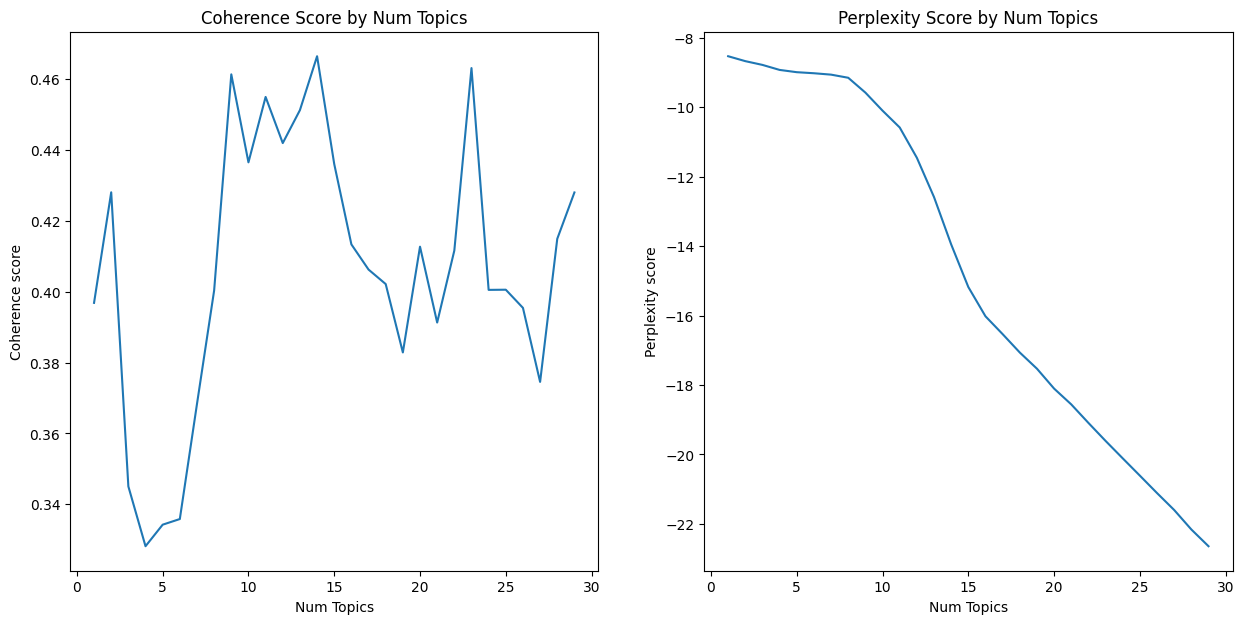

In [ ]:
def compute_metrics(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        model_list.append(model)
        perplexity_values.append(model.log_perplexity(corpus))
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values, perplexity_values

start, limit, step = 1, 30, 1
model_list, coherence_values, perplexity_values = compute_metrics(id2word, corpus, data_lemmatized, start, limit, step)

# Визуализация
x = range(start, limit, step)

plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score by Num Topics")

plt.subplot(1, 2, 2)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.title("Perplexity Score by Num Topics")

plt.show()


In [ ]:
# Выбор оптимального количества тем
optimal_coherence_index = coherence_values.index(max(coherence_values))
optimal_perplexity_index = perplexity_values.index(min(perplexity_values))
optimal_coherence_num_topics = range(1, 30, 1)[optimal_coherence_index]
optimal_perplexity_num_topics = range(1, 30, 1)[optimal_perplexity_index]

print("Оптимальное количество тем по когерентности:", optimal_coherence_num_topics, "с когерентностью", max(coherence_values))
print("Оптимальное количество тем по перплексии:", optimal_perplexity_num_topics, "с перплексией", min(perplexity_values))

Оптимальное количество тем по когерентности: 14 с когерентностью 0.4664788433968954
Оптимальное количество тем по перплексии: 29 с перплексией -22.644570654350165


Когерентность  отражает, насколько логично и последовательно слова группируются в темы, то есть насколько темы интерпретируемы.
Перплексия показывает, насколько хорошо модель предсказывает выборку данных.
В данном случае мы отдадим предпочтение когерентности, так как перплексия не всегда коррелирует с качеством интерпретации тем.

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"работает" + 0.027*"решить" + 0.022*"однои" + 0.021*"нормально" + '
  '0.021*"оператору" + 0.019*"отдельно" + 0.019*"ждать" + 0.019*"связаться" + '
  '0.016*"стоит" + 0.015*"изначально"'),
 (1,
  '0.068*"решила" + 0.038*"которую" + 0.022*"руб" + 0.018*"мама" + '
  '0.018*"какую" + 0.017*"отношения" + 0.015*"помогают" + 0.014*"рынке" + '
  '0.014*"новую" + 0.011*"бухгалтерия"'),
 (2,
  '0.041*"ответили" + 0.035*"картои" + 0.033*"попросила" + 0.027*"нужно" + '
  '0.026*"оформила" + 0.021*"лимит" + 0.020*"одно" + 0.020*"большое" + '
  '0.019*"оказывается" + 0.018*"обман"'),
 (3,
  '0.027*"благодарю" + 0.023*"помогает" + 0.022*"обращения" + 0.019*"звонить" '
  '+ 0.014*"этим" + 0.013*"позиции" + 0.012*"дают" + 0.009*"ситуациях" + '
  '0.008*"отзывов" + 0.006*"людьми"'),
 (4,
  '0.069*"позвонил" + 0.050*"могу" + 0.023*"денег" + 0.022*"говорит" + '
  '0.021*"история" + 0.018*"ребята" + 0.018*"назад" + 0.018*"заявку" + '
  '0.017*"получается" + 0.017*"любои"'),
 (5,
  '0.030*"от

# Визуализация

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.382023 -0.219251       1        1  39.287270
7      0.248822  0.316447       2        1  25.193238
13    -0.036106 -0.013187       3        1   6.984494
4     -0.049762 -0.009520       4        1   4.818606
5     -0.052445 -0.009567       5        1   4.573614
0     -0.054950 -0.009129       6        1   4.319819
2     -0.054390 -0.008650       7        1   3.397552
12    -0.055603 -0.008499       8        1   3.373797
8     -0.056282 -0.007820       9        1   2.483183
1     -0.056646 -0.007747      10        1   2.440437
10    -0.055991 -0.006680      11        1   1.388308
3     -0.054530 -0.006009      12        1   0.919762
6     -0.053940 -0.005799      13        1   0.692343
9     -0.050200 -0.004588      14        1   0.127576, topic_info=          Term        Freq       Total Category  logprob  loglift
1         банк  878.000000  878.000000  Default  30.0000  30.0000
95    тинькофф  473.000000  473.000000  Default  29.0000  29.0000
585   позвонил   98.000000   98.000000  Default  28.0000  28.0000
718     почему  210.000000  210.000000  Default  27.0000  27.0000
4         днеи  320.000000  320.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
4037    подаче    0.004255    0.871641  Topic14  -9.0825   1.3418
1825  подходит    0.004256    0.882718  Topic14  -9.0820   1.3296
3659  отличное    0.004256    0.884530  Topic14  -9.0820   1.3276
5404  кредитки    0.004256    0.894144  Topic14  -9.0820   1.3168
6758   полного    0.004255    0.882263  Topic14  -9.0825   1.3297

[513 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
646      11  0.809904     allairline
1034      5  0.965410  tinkoff_black
523       8  0.919148      актуально
1         1  0.998099           банк
1         2  0.001138           банк
...     ...       ...            ...
222       8  0.834420         честно
729       3  0.959496          числа
1127     12  0.848666           этим
69        1  0.992277           этои
1168     11  0.864494           явно

[376 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 8, 14, 5, 6, 1, 3, 13, 9, 2, 11, 4, 7, 10])

По визуализации можно предположить, что темы 3-14 достаточно близки, поэтому можно разбить отзывы на 3 темы.

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"банк" + 0.016*"тинькофф" + 0.009*"спасибо" + 0.008*"вопросы" + '
  '0.007*"которые" + 0.007*"сотрудники" + 0.006*"проблемы" + 0.006*"всем" + '
  '0.006*"клиентов" + 0.006*"банка"'),
 (1,
  '0.016*"банк" + 0.013*"днеи" + 0.008*"кредит" + 0.008*"почему" + '
  '0.007*"позвонил" + 0.005*"решила" + 0.005*"деньги" + 0.004*"просто" + '
  '0.004*"позвонила" + 0.004*"которыи"'),
 (2,
  '0.014*"карта" + 0.010*"карты" + 0.006*"кредитная_карта" + 0.005*"покупки" + '
  '0.005*"пользуюсь" + 0.005*"деньги" + 0.004*"получил" + 0.004*"месяц" + '
  '0.004*"вообще" + 0.004*"никаких"')]


Темы можно назвать следующим образом:


*   **Качество обслуживания клиентов** (т.к. большой вес имеют слова 'спасибо', 'вопросы', 'проблемы', 'клиентов')
*   **Кредитные операции** ( используются слова "кредит", "позвонил", "решила", "деньги". Это может свидетельствовать о теме, связанной с кредитными операциями, а также с обсуждением условий кредитования, процесса получения кредита и возможных проблем при взаимодействии с банком.)
*   **Использование кредитных карт** (Ключевые слова "карта", "карты", "кредитная_карта", "покупки", "пользуюсь", "деньги" указывают на обсуждение, связанное с использованием кредитных карт, в том числе покупки.)





In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.778443400481049

Coherence Score:  0.3450459900362644


# Анализ score

In [ ]:
data1 = df[df['bank_name'] == "тинькофф банк"]

data1['score'].replace('', np.nan, inplace=True)

data1.dropna(subset=['score'], inplace=True)

<ipython-input-312-11a277a5e4bb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['score'].replace('', np.nan, inplace=True)
<ipython-input-312-11a277a5e4bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['score'].replace('', np.nan, inplace=True)
<ipython-input-312-11a277a5e4bb>:5: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
dominant_topics = []
for doc in lda_model.get_document_topics(corpus, minimum_probability=0.0):
    if doc:
        dominant_topic = sorted(doc, key=lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append(dominant_topic)
    else:
        dominant_topics.append(None)

data1['Dominant_Topic'] = dominant_topics

<ipython-input-313-4c2ee3ff6399>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Dominant_Topic'] = dominant_topics


In [ ]:
# Преобразование типа данных столбца 'score' в числовой
data1['score'] = pd.to_numeric(data1['score'], errors='coerce')

<ipython-input-314-c62610332e76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['score'] = pd.to_numeric(data1['score'], errors='coerce')


In [ ]:
data1.groupby('Dominant_Topic')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
Dominant_Topic,,,,,,,,
0,579.0,4.333333,1.414621,1.0,5.0,5.0,5.0,5.0
1,333.0,2.954955,1.851672,1.0,1.0,3.0,5.0,5.0
2,232.0,3.586207,1.695775,1.0,2.0,5.0,5.0,5.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


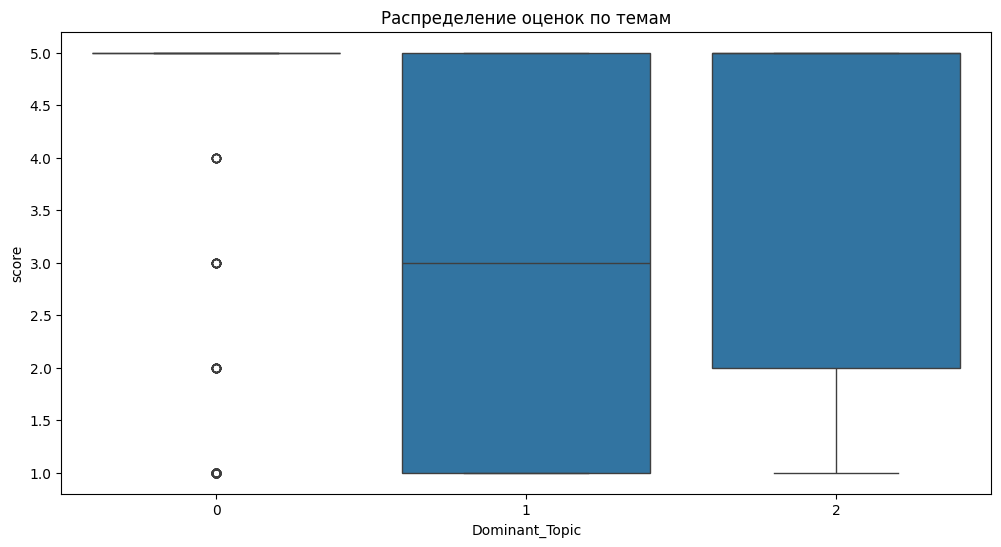

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dominant_Topic', y='score', data=data1)
plt.title('Распределение оценок по темам')
plt.show()


**0 - Качество обслуживания клиентов**

Средняя оценка 4.33 говорит о высоком уровне удовлетворенности клиентов взаимодействием с банком, что может отражать качественное обслуживание клиентов и успешное решение их проблем. Медиана и 25-й процентиль в 5.0 указывают на то, что большинство отзывов положительны.

**1 - Кредитные операции**

Средняя оценка 2.95 значительно ниже по сравнению с темой 0, что указывает на проблемы или недовольство, связанные с кредитными операциями. Медиана 3.0 подчеркивает смешанные отзывы клиентов.

**2 - Использование кредитных карт**

Средняя оценка 3.58 лежит между оценками двух других тем и свидетельствует о смешанных отзывах клиентов по поводу использования кредитных карт. Медиана и 75-й процентиль в 5.0 показывают, что значительная доля отзывов положительна, несмотря на наличие критики.

Таким образом, отзывы относящиеся к теме 0 получили наивысшие оценки, что подчеркивает общее положительное восприятие банка клиентами.
Отзывы связанные с кредитными операциями получили наименьшую среднюю и медианную оценки, что может указывать на наличие некоторых недовольств в этой сфере.
